Reference: https://towardsdatascience.com/finding-shortest-path-using-q-learning-algorithm-1c1f39e89505

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd
%matplotlib inline

In [2]:
def initialize_graph(e):
  edges = e
  g = nx.Graph()
  g.add_edges_from(edges)
  pos = nx.spring_layout(g)
  nx.draw_networkx_nodes(g,pos)
  nx.draw_networkx_edges(g,pos)
  nx.draw_networkx_labels(g,pos)
  plt.show()
  return g


In [3]:
# Intitialize Reward Matrix
def init_reward_matrix():
  r = np.matrix(np.zeros(shape = (11,11)))
  for x in g[10]:
    r[x,10] = 100
  pd.DataFrame(r)
  return r

In [4]:
#Initialize Q Matrix
def init_q_matrix():
  q = np.matrix(np.zeros(shape = (11,11)))
  q-=100
  for node in g.nodes:
    for x in g[node]:
      q[node,x]=0
      q[x,node]=0
  pd.DataFrame(q)
  return q
  

In [5]:
def next_number(start,er):
  random_value = random.uniform(0,1)
  if random_value < er:
    sample= g[start]
  else:
    sample = np.where(q[start,] == np.max(q[start]))[1]
  next_node = int(np.random.choice(sample,1))
  return next_node


In [6]:
def updateQ(node1,node2,lr,discount):
  max_index = np.where(q[node2,]==np.max(q[node2,]))[1]
  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = q[node2,max_index]
  q[node1,node2] = int((1-lr)*q[node1,node2]+lr*(r[node1,node2]+discount*max_value))
  

In [7]:
def learn(er,lr,discount):
  for i in range(50000):
    start = np.random.randint(0,11)
    next_node = next_number(start,er)
    updateQ(start,next_node,lr,discount)


In [8]:
def shortest_path(begin, end):
  path = [begin]
  next_node = np.argmax(q[begin,])
  path.append(next_node)
  while next_node != end:
    next_node = np.argmax(q[next_node,])
    path.append(next_node)
  return path

In [9]:
e = [(0,4), (4,0), (0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),(1,5),(5,1),(2,5), (5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]

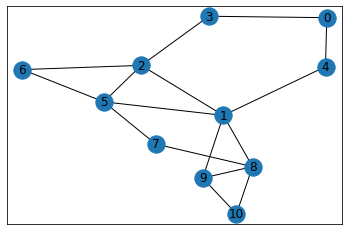

In [10]:
g = initialize_graph(e)

In [11]:
r = init_reward_matrix()

In [12]:
pd.DataFrame(r)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [13]:
q = init_q_matrix()

In [14]:
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [15]:
learn(0.5,0.8,0.8)
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,110.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,138.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,174.0,-100.0,110.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,138.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,138.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


In [16]:
shortest_path(0,10)

[0, 4, 1, 8, 10]

In [17]:
shortest_path(2,10)

[2, 1, 8, 10]

In [18]:
shortest_path(3,10)

[3, 2, 1, 8, 10]

In [19]:
shortest_path(1, 10)

[1, 8, 10]

In [20]:
shortest_path(4, 10)

[4, 1, 8, 10]

In [21]:
e.remove((2,1))
e.remove((1,2))

In [22]:
e

[(0, 4),
 (4, 0),
 (0, 3),
 (3, 0),
 (1, 4),
 (4, 1),
 (1, 8),
 (8, 1),
 (1, 9),
 (9, 1),
 (2, 3),
 (3, 2),
 (2, 6),
 (6, 2),
 (1, 5),
 (5, 1),
 (2, 5),
 (5, 2),
 (5, 6),
 (6, 5),
 (7, 8),
 (8, 7),
 (7, 5),
 (5, 7),
 (8, 9),
 (9, 8),
 (8, 10),
 (10, 8),
 (9, 10),
 (10, 9)]

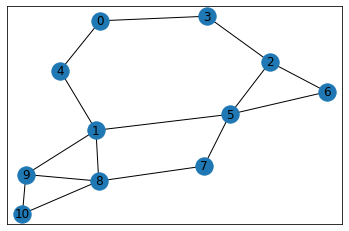

In [23]:
g = initialize_graph(e)

In [24]:
r = init_reward_matrix()

In [25]:
pd.DataFrame(r)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [26]:
q = init_q_matrix()

In [27]:
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [28]:
learn(0.5,0.8,0.8)
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,87.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,-100.0,-100.0,87.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,110.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,110.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,110.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


#Safe Shortest Path after disabling connection between node 1 and 2

In [29]:
shortest_path(2, 10)

[2, 5, 1, 8, 10]

In [30]:
shortest_path(3, 10)

[3, 0, 4, 1, 8, 10]

In [31]:
e.remove((7,8))
e.remove((8,7))

In [32]:
e

[(0, 4),
 (4, 0),
 (0, 3),
 (3, 0),
 (1, 4),
 (4, 1),
 (1, 8),
 (8, 1),
 (1, 9),
 (9, 1),
 (2, 3),
 (3, 2),
 (2, 6),
 (6, 2),
 (1, 5),
 (5, 1),
 (2, 5),
 (5, 2),
 (5, 6),
 (6, 5),
 (7, 5),
 (5, 7),
 (8, 9),
 (9, 8),
 (8, 10),
 (10, 8),
 (9, 10),
 (10, 9)]

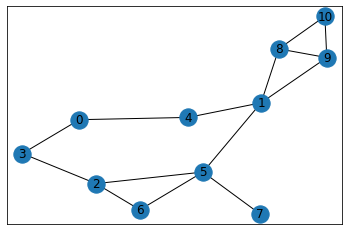

In [33]:
g = initialize_graph(e)

In [34]:
r = init_reward_matrix()

In [35]:
pd.DataFrame(r)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [36]:
q = init_q_matrix()

In [37]:
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [38]:
learn(0.5,0.8,0.8)
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,87.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,-100.0,-100.0,87.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,110.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,110.0,-100.0,-100.0,-100.0,110.0,110.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,110.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


#Safe Shortest Path after disabling connection between node 7 and 8

In [39]:
shortest_path(7, 10)

[7, 5, 1, 8, 10]

In [40]:
shortest_path(0, 10)

[0, 4, 1, 8, 10]

In [41]:
shortest_path(2, 10)

[2, 5, 1, 8, 10]